In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df=pd.read_csv('/content/mushrooms.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [61]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [62]:
# check for null values
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [63]:
df['stalk-root'].value_counts()

,count
stalk-root,
b,3776
?,2480
e,1120
c,556
r,192


In [64]:
df[df['stalk-root'] == '?']['class'].value_counts(normalize=True)
# This shows about 71% of the mushrooms with '?' stalk-root are poisonous so we can't ignore the '?'

,proportion
class,
p,0.709677
e,0.290323


In [65]:
# dropping unnecessary column
df.drop('veil-type', axis=1, inplace=True)

# dropped the veil-type column because it’s uninformative—it contains only one unique value across all 8,124 samples: 'partial'. That means it has zero variance, which makes it:

# Useless for prediction: It doesn’t help the model distinguish between edible and poisonous mushrooms.

# Noise in the data: Including it adds dimensionality without any gain.

# Redundant

In [66]:
from sklearn.preprocessing import OneHotEncoder

# Initialize encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the data
encoded_array = encoder.fit_transform(df)

# Convert to DataFrame
df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(df.columns))


In [67]:
df

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [68]:
# Defining dependent and independent features
X = df.iloc[ : , 2:]
y = df.iloc[ : , 0:1]

In [69]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.35, random_state = 42)

In [70]:
X_train

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
7353,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1366,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1469,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1851,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1963,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5390,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
860,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7603,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [71]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [72]:
# Pre Pruning
param_grid = {'criterion':['gini', 'entropy', 'log_loss'],
              'splitter' :['best', 'random'],
              'max_depth' : [None,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
              'max_features':['auto', 'sqrt', 'log2']}

In [73]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dt, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

In [74]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 558 candidates, totalling 2790 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
930 fits failed out of a total of 2790.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
930 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                       12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
                                       22, 23, 24, 25, 26, 27, 28, 29, ...],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=1)

In [75]:
best_dt = cv.best_estimator_
y_pred1 = best_dt.predict(X_test)


In [76]:
from sklearn.metrics import accuracy_score
print("Accuracy score of the model is:", accuracy_score(y_test, y_pred1))

Accuracy score of the model is: 1.0


In [77]:
print("Tree depth:", best_dt.get_depth())

Tree depth: 12


[Text(0.6, 0.9, 'x[61] <= 0.272\ngini = 0.499\nsamples = 5280\nvalue = [2543.0, 2737.0]'),
 Text(0.3333333333333333, 0.7, 'x[27] <= 0.799\ngini = 0.421\nsamples = 3785\nvalue = [1138, 2647]'),
 Text(0.4666666666666667, 0.8, 'True  '),
 Text(0.13333333333333333, 0.5, 'x[80] <= 0.561\ngini = 0.435\nsamples = 1560\nvalue = [1062.0, 498.0]'),
 Text(0.06666666666666667, 0.3, 'gini = 0.0\nsamples = 318\nvalue = [318, 0]'),
 Text(0.2, 0.3, 'x[35] <= 0.701\ngini = 0.48\nsamples = 1242\nvalue = [744, 498]'),
 Text(0.13333333333333333, 0.1, '\n  (...)  \n'),
 Text(0.26666666666666666, 0.1, '\n  (...)  \n'),
 Text(0.5333333333333333, 0.5, 'x[72] <= 0.669\ngini = 0.066\nsamples = 2225\nvalue = [76, 2149]'),
 Text(0.4666666666666667, 0.3, 'x[99] <= 0.178\ngini = 0.061\nsamples = 2219\nvalue = [70, 2149]'),
 Text(0.4, 0.1, '\n  (...)  \n'),
 Text(0.5333333333333333, 0.1, '\n  (...)  \n'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.8666666666666667, 0.7, 'x[50] <= 0.838\ngini

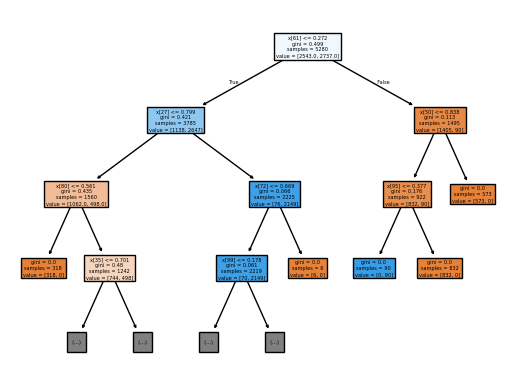

In [78]:
from sklearn.tree import plot_tree
plot_tree(best_dt, filled=True, max_depth=3)  # Just the top levels


In [79]:
print("Cross-validation score:", cv.best_score_)


Cross-validation score: 1.0


In [80]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(best_dt, X_train, y_train['class_e'], cv=skf)
print("Stratified CV scores:", scores)
print("Mean CV score:", scores.mean())

Stratified CV scores: [1.         1.         0.99905303 1.         0.99621212]
Mean CV score: 0.9990530303030303


In [81]:
import pandas as pd
pd.Series(best_dt.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)

,0
stalk-surface-below-ring_k,0.332106
odor_n,0.290863
stalk-root_b,0.101707
gill-size_b,0.086352
spore-print-color_h,0.061609
spore-print-color_r,0.034164
stalk-color-below-ring_w,0.030878
gill-spacing_w,0.017537
stalk-shape_e,0.015337
spore-print-color_u,0.007597
